In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

In [2]:
data = pd.read_csv("C:\Lachin\DataSets\Heart Failure Prediction\heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(918, 12)

### Data Analysis

In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0, 0.5, 'Spread')

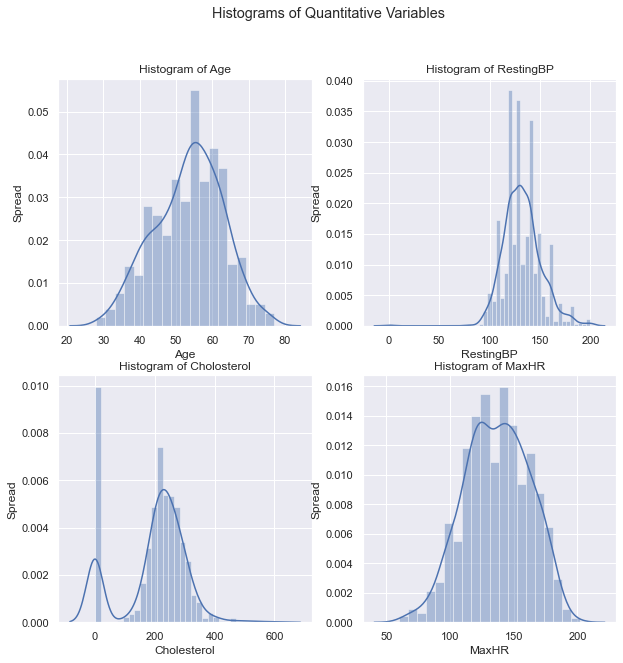

In [9]:
sns.set_theme()
fig, axes = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Histograms of Quantitative Variables')

sns.distplot(data['Age'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Histogram of Age')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Spread')

sns.distplot(data['RestingBP'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Histogram of RestingBP')
axes[0,1].set_xlabel('RestingBP')
axes[0,1].set_ylabel('Spread')

sns.distplot(data['Cholesterol'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Histogram of Cholosterol')
axes[1,0].set_xlabel('Cholesterol')
axes[1,0].set_ylabel('Spread')

sns.distplot(data['MaxHR'], kde=True, ax=axes[1,1])
axes[1,1].set_title('Histogram of MaxHR')
axes[1,1].set_xlabel('MaxHR')
axes[1,1].set_ylabel('Spread')





In [10]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
d1 = data.drop(['Age','RestingBP','Cholesterol','MaxHR'], axis=1)

In [12]:
d1.columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'Oldpeak', 'ST_Slope', 'HeartDisease'],
      dtype='object')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

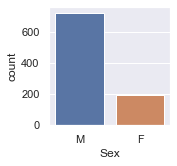

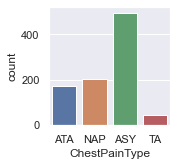

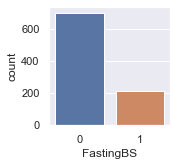

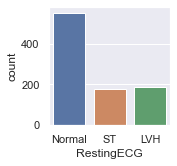

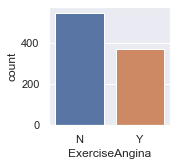

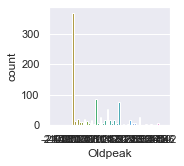

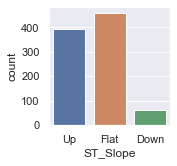

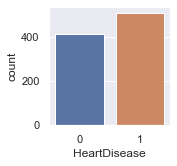

In [13]:
for i,j in enumerate(d1.columns):
    plt.figure(figsize=(10,10))
    plt.subplot(4,4,i+1)
    sns.countplot(data[j])
plt.show()

In [14]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

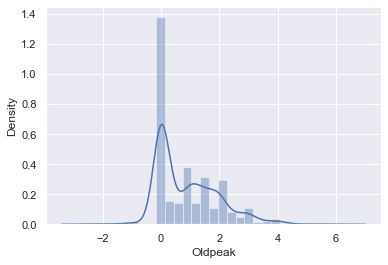

In [15]:
sns.distplot(data['Oldpeak'], kde=True)#Somewhat categorical

In [16]:
data['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: Oldpeak, dtype: int64

In [17]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

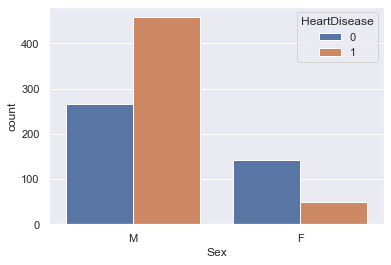

In [18]:
sns.countplot(data['Sex'], hue=data['HeartDisease'])
#Males have caught to heartdisease when comparing to the female b ut cannot directly express since data is imbalanced

<AxesSubplot:xlabel='count', ylabel='ChestPainType'>

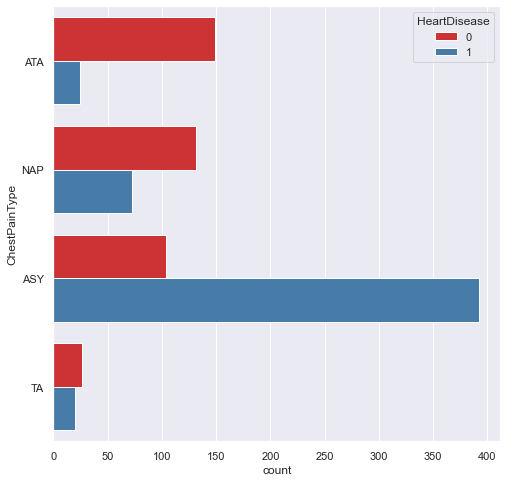

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(y=data['ChestPainType'], hue=data['HeartDisease'], palette="Set1" )
#This is a major factor
# If it is ASY(Asymptomatic) there is a high probability of heart disease

In [20]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FastingBS', ylabel='count'>

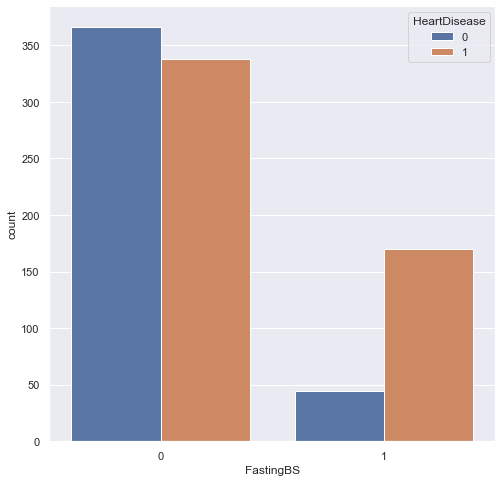

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(data['FastingBS'], hue=data['HeartDisease'])
#if fasting sugar is high, there is a high probability of getting sick

In [22]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingECG', ylabel='count'>

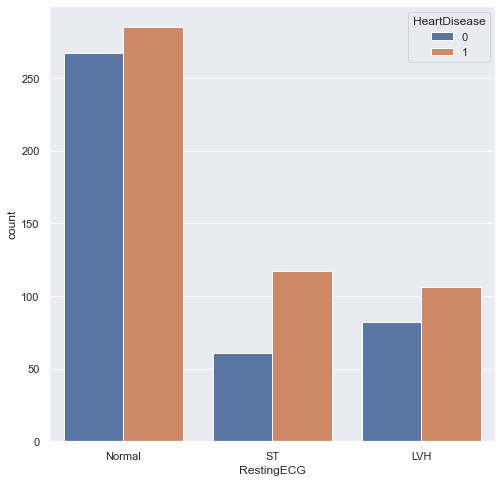

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(data['RestingECG'], hue=data['HeartDisease'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

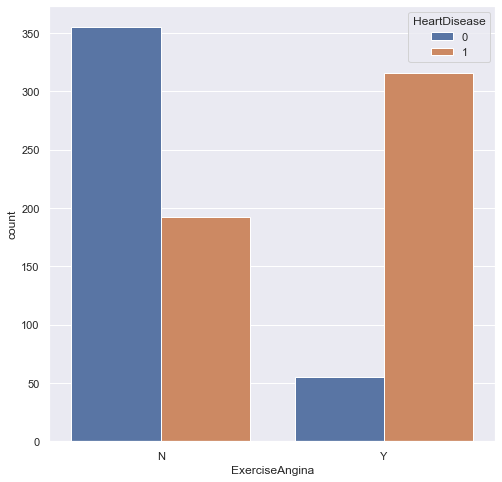

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(data['ExerciseAngina'], hue=data['HeartDisease'])
#This is a significant factor
#More causes of heart failures as this deceases is there

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

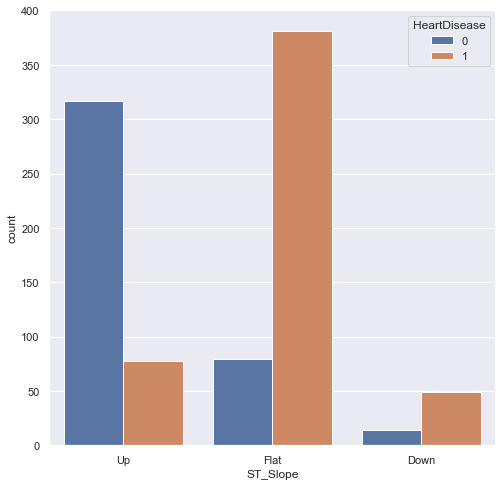

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(data['ST_Slope'], hue=data['HeartDisease'])
#Another signifixant factor


In [26]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Figure size 720x720 with 0 Axes>

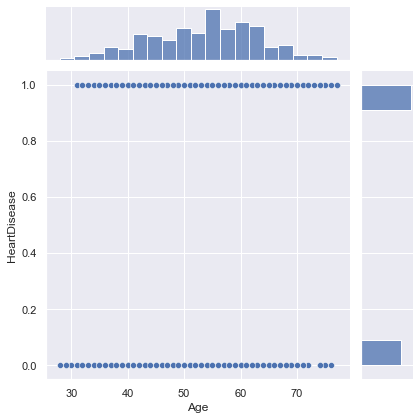

In [27]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x='Age', y='HeartDisease')
#Age is not impacting much

<Figure size 720x720 with 0 Axes>

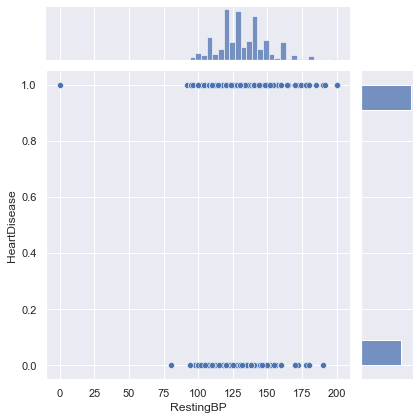

In [28]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x='RestingBP', y='HeartDisease')
#outliers present

<Figure size 720x720 with 0 Axes>

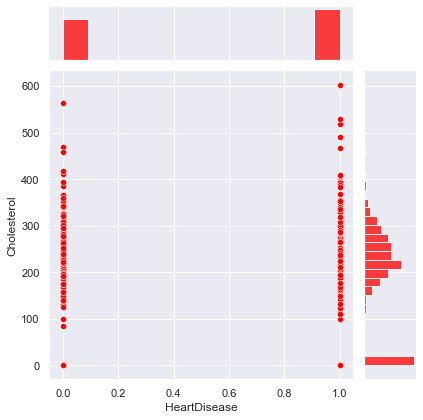

In [29]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, y='Cholesterol', x='HeartDisease', color='red')

<Figure size 720x720 with 0 Axes>

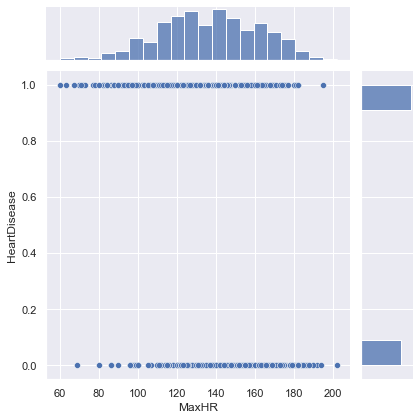

In [30]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x='MaxHR', y='HeartDisease')

<Figure size 720x720 with 0 Axes>

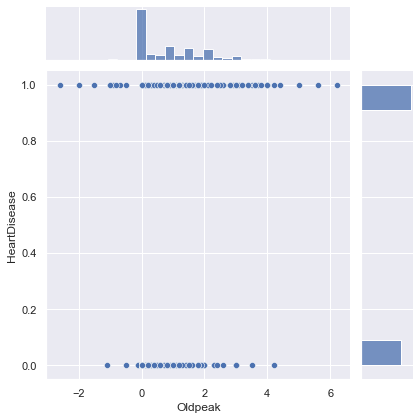

In [31]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x='Oldpeak', y='HeartDisease')
#Oldpeak is doing somewhat influence to the heartdisease

In [32]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Figure size 576x576 with 0 Axes>

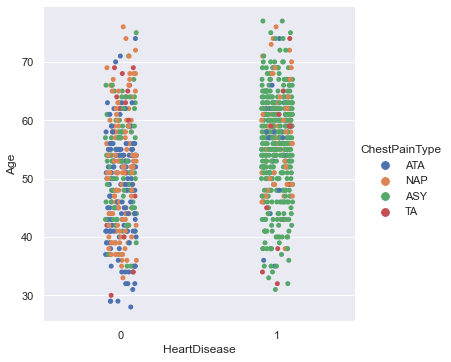

In [33]:
plt.figure(figsize=(8,8))
sns.catplot(data=data, x='HeartDisease', y='Age', hue='ChestPainType')
#can see the difference ASY

<Figure size 576x576 with 0 Axes>

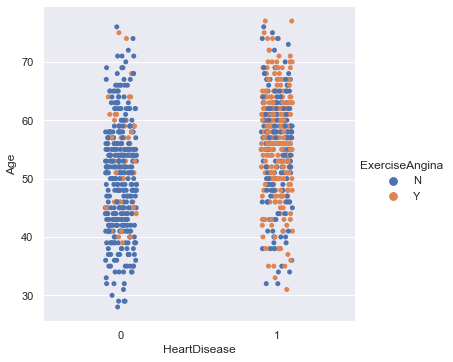

In [34]:
plt.figure(figsize=(8,8))
sns.catplot(data=data, x='HeartDisease', y='Age', hue='ExerciseAngina')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

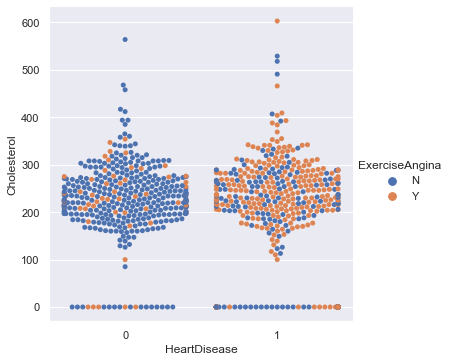

In [35]:
plt.figure(figsize=(8,8))
sns.catplot(data=data, x='HeartDisease', y='Cholesterol', hue='ExerciseAngina',kind='swarm')

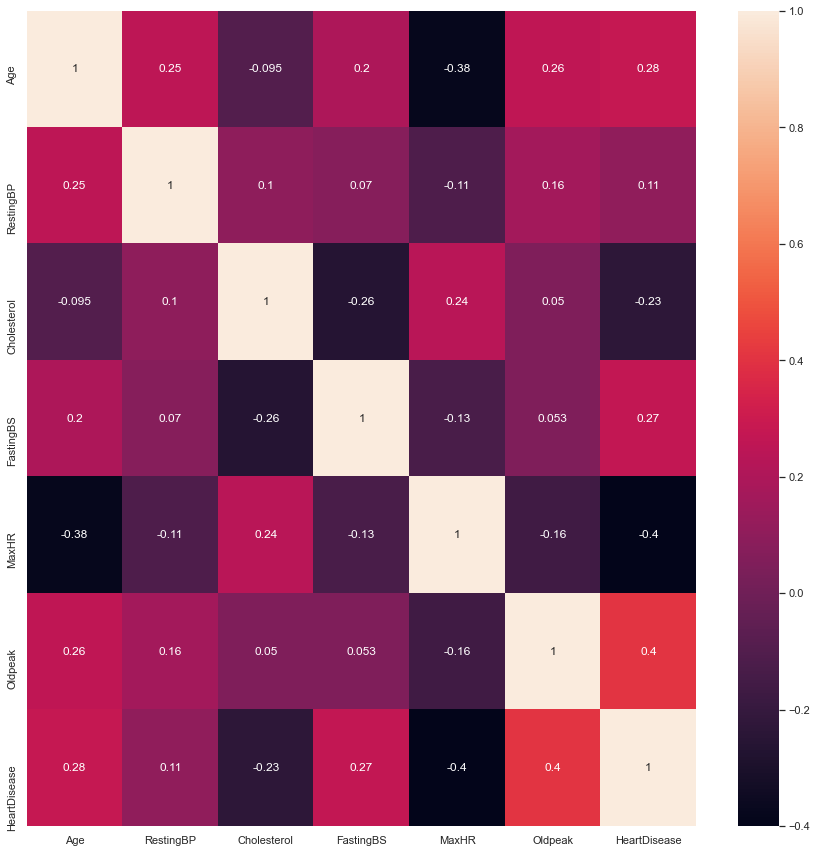

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

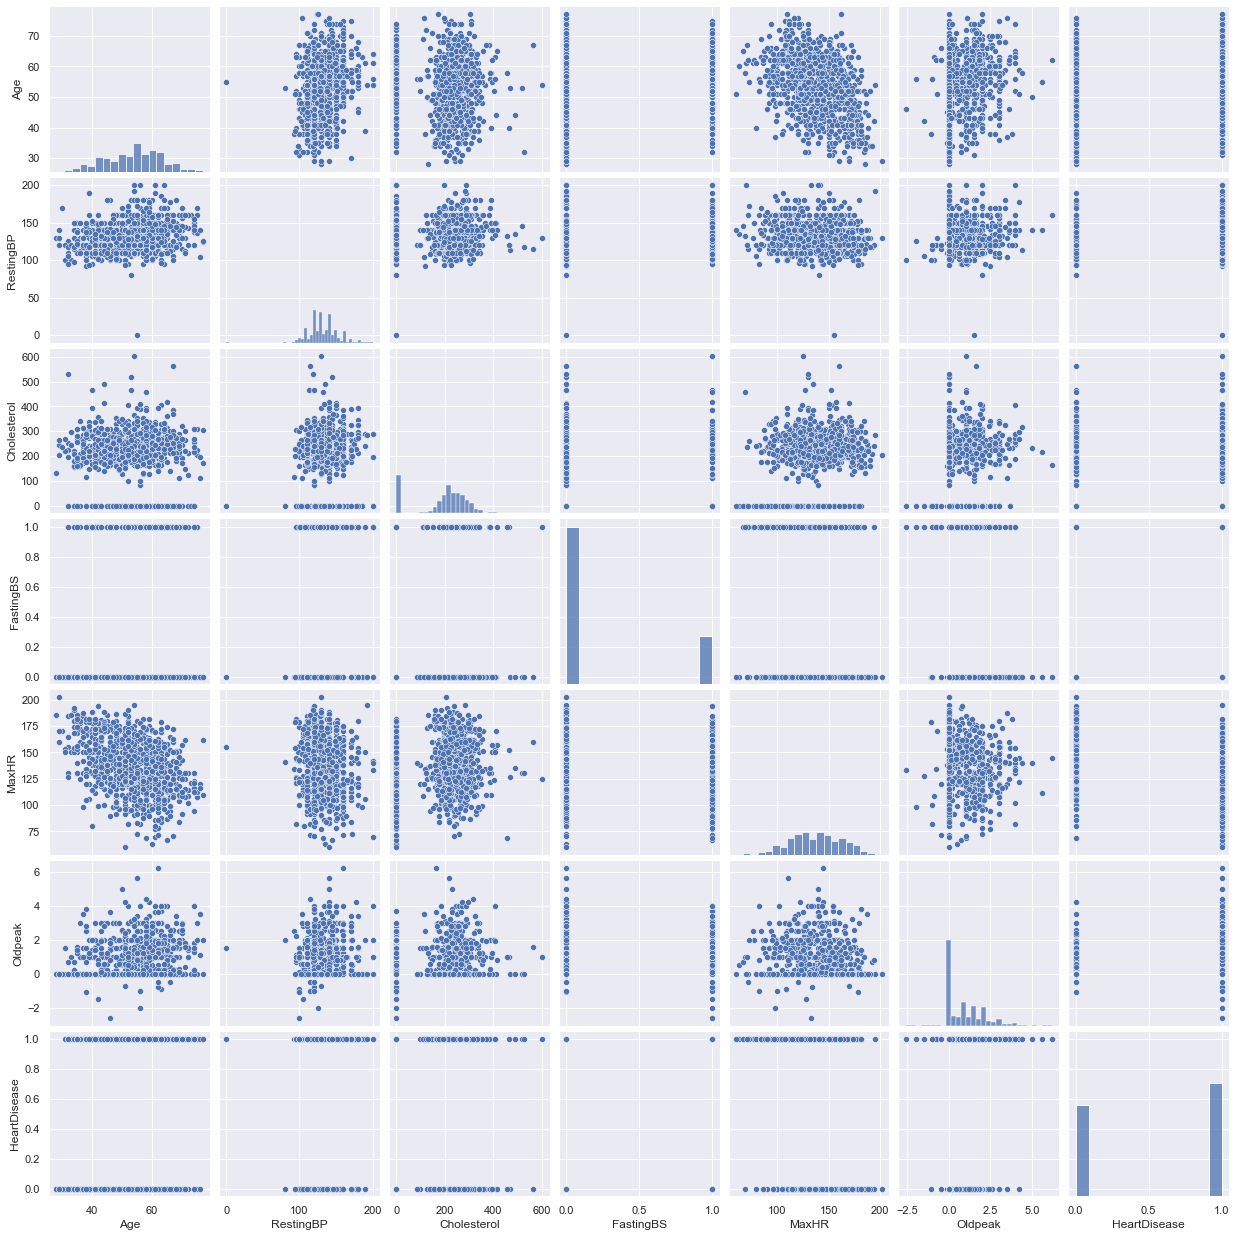

In [37]:
sns.pairplot(data)

## Data Preprocessing

In [38]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [39]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

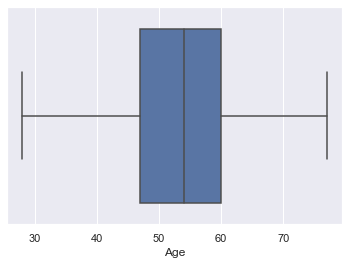

In [40]:
sns.boxplot(data['Age'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingBP'>

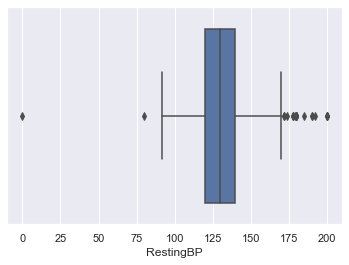

In [41]:
sns.boxplot(data['RestingBP'])
#Outliers have
#From this only outliers are removed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

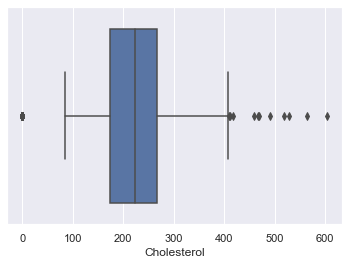

In [42]:
sns.boxplot(data['Cholesterol'])#Outliers have

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxHR'>

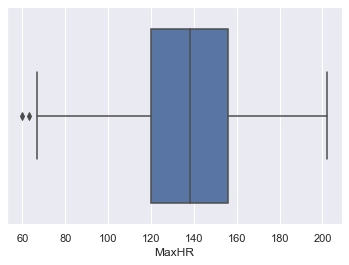

In [43]:
sns.boxplot(data['MaxHR'])

In [44]:
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

In [45]:
outrows = ((data['RestingBP'] < Q1 - 1.5*IQR)|(data['RestingBP']>Q3+1.5*IQR))

In [46]:
data1 = data.copy()
data1 = data1[~outrows]
print('Shape before removing the outlier {}'.format(data.shape))
print('shape after removing the outliers {}'.format(data1.shape))

Shape before removing the outlier (918, 12)
shape after removing the outliers (890, 12)


In [47]:
data = data1.copy()

In [48]:
data.shape

(890, 12)

In [49]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [51]:
data.duplicated().sum()

0

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             890 non-null    int64  
 1   Sex             890 non-null    object 
 2   ChestPainType   890 non-null    object 
 3   RestingBP       890 non-null    int64  
 4   Cholesterol     890 non-null    int64  
 5   FastingBS       890 non-null    int64  
 6   RestingECG      890 non-null    object 
 7   MaxHR           890 non-null    int64  
 8   ExerciseAngina  890 non-null    object 
 9   Oldpeak         890 non-null    float64
 10  ST_Slope        890 non-null    object 
 11  HeartDisease    890 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 90.4+ KB


In [53]:
data['FastingBS'].value_counts()

0    685
1    205
Name: FastingBS, dtype: int64

In [54]:
data['FastingBS'] = data['FastingBS'].apply(str)
#Transforming it to object

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             890 non-null    int64  
 1   Sex             890 non-null    object 
 2   ChestPainType   890 non-null    object 
 3   RestingBP       890 non-null    int64  
 4   Cholesterol     890 non-null    int64  
 5   FastingBS       890 non-null    object 
 6   RestingECG      890 non-null    object 
 7   MaxHR           890 non-null    int64  
 8   ExerciseAngina  890 non-null    object 
 9   Oldpeak         890 non-null    float64
 10  ST_Slope        890 non-null    object 
 11  HeartDisease    890 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 90.4+ KB


In [56]:
#Dummy Creation
data = pd.get_dummies(data, columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)

In [57]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1


In [58]:
data.shape

(890, 16)

In [59]:
data.to_csv("C:\Lachin\DataSets\Heart Failure Prediction\heart_dummy.csv", index=False)

## Machine Leraning

In [60]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [62]:
model = LogisticRegression()

In [63]:
model.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test,model.predict(x_test)))#Somewhat Underfit

0.8665730337078652
0.898876404494382


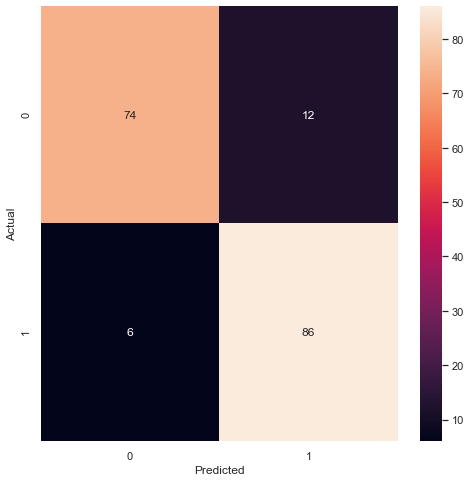

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
models_list = []
accuracy = []
def classification(algo,x_train,x_test,y_train,y_test):
    models_list.append(algo)
    model = algo
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    # Accuracies
    print('Accuracy of Training Data'.center(40,'='))
    print(accuracy_score(y_train,model.predict(x_train)))
    print('Accuracy of Testing Data'.center(40,'='))
    print(accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    
    #Confusion Matrix
    print('Confusion Matrix'.center(40,'='))
    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_test,model.predict(x_test)), annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Classification Report
    print('Classification Report'.center(40,'='))
    print(classification_report(y_test,y_pred))
    
    
    

#### Logistic Regression

=======Accuracy of Training Data========
0.8665730337078652
========Accuracy of Testing Data========
0.898876404494382
============Confusion Matrix============


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


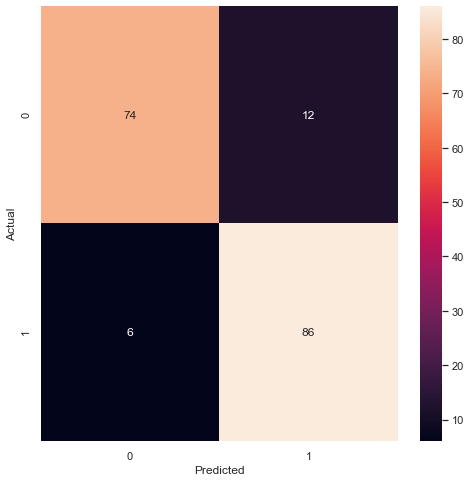

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        86
           1       0.88      0.93      0.91        92

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [67]:
classification(LogisticRegression(),x_train,x_test,y_train,y_test )

#### KNN

In [68]:
stc = StandardScaler()

In [69]:
x_train_std = stc.fit_transform(x_train)
x_test_std = stc.fit_transform(x_test)

=======Accuracy of Training Data========
0.8974719101123596
========Accuracy of Testing Data========
0.8764044943820225
============Confusion Matrix============


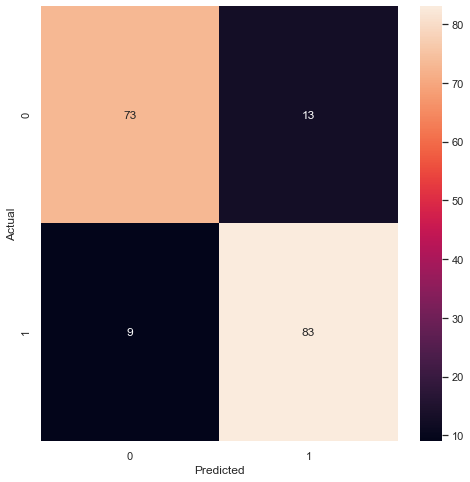

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        86
           1       0.86      0.90      0.88        92

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



In [70]:
classification(KNeighborsClassifier(n_neighbors=5),x_train_std,x_test_std,y_train,y_test)

In [71]:
K = range(1,40)
MCE = []
for k in K:
    model1 = KNeighborsClassifier(n_neighbors=k)
    model1.fit(x_train_std,y_train)
    MCE.append(1-accuracy_score(y_test, model1.predict(x_test_std)))
    

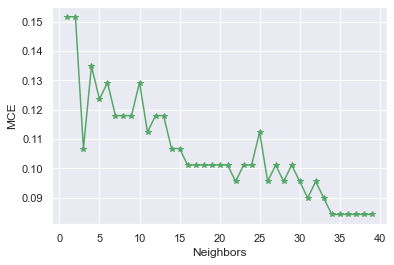

In [72]:
plt.plot(K,MCE, 'g*-')
plt.xlabel('Neighbors')
plt.ylabel('MCE')
plt.show()

=======Accuracy of Training Data========
0.9115168539325843
========Accuracy of Testing Data========
0.8932584269662921
============Confusion Matrix============


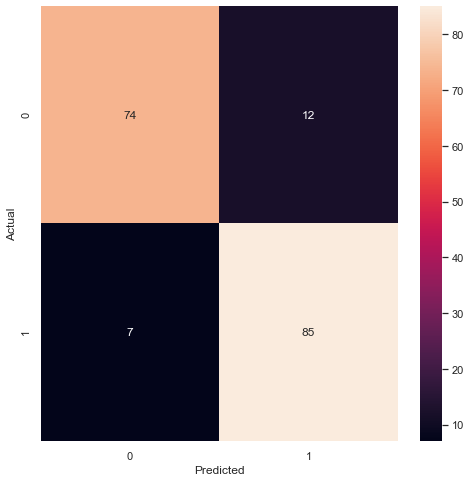

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        86
           1       0.88      0.92      0.90        92

    accuracy                           0.89       178
   macro avg       0.89      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



In [73]:
classification(KNeighborsClassifier(n_neighbors=3),x_train_std,x_test_std,y_train,y_test)#Good generalized model
#not overfitted

### LDA

=======Accuracy of Training Data========
0.8679775280898876
========Accuracy of Testing Data========
0.8932584269662921
============Confusion Matrix============


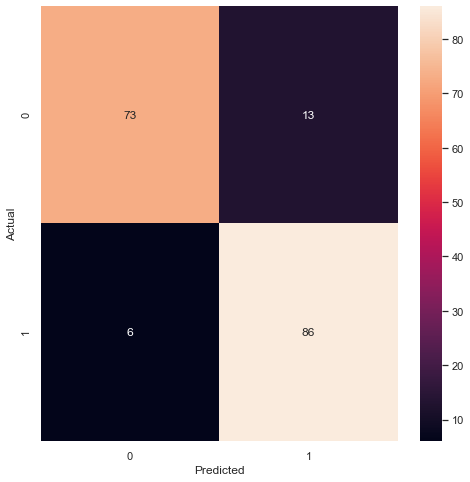

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        86
           1       0.87      0.93      0.90        92

    accuracy                           0.89       178
   macro avg       0.90      0.89      0.89       178
weighted avg       0.90      0.89      0.89       178



In [74]:
classification(LinearDiscriminantAnalysis(),x_train,x_test,y_train,y_test )#Undervitting qualitites

#### QDA

=======Accuracy of Training Data========
0.8651685393258427
========Accuracy of Testing Data========
0.898876404494382
============Confusion Matrix============


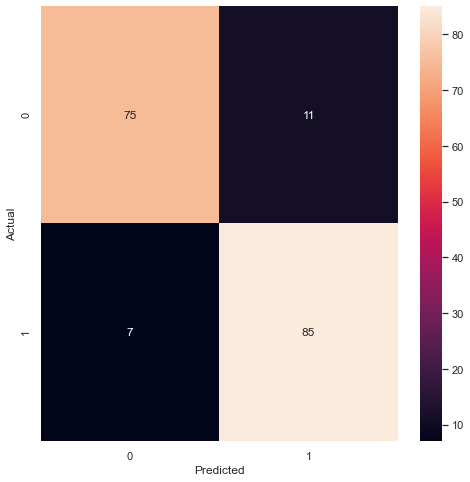

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        86
           1       0.89      0.92      0.90        92

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [75]:
classification(QuadraticDiscriminantAnalysis(), x_train,x_test,y_train,y_test)#Good genearalised Model

#### NaiveBayes

=======Accuracy of Training Data========
0.8581460674157303
========Accuracy of Testing Data========
0.8932584269662921
============Confusion Matrix============


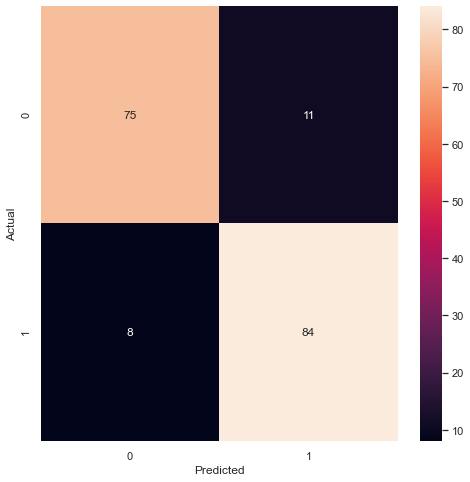

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        86
           1       0.88      0.91      0.90        92

    accuracy                           0.89       178
   macro avg       0.89      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



In [76]:
classification(GaussianNB(), x_train,x_test,y_train,y_test)#underfit

#### Support Vector Classifier

=======Accuracy of Training Data========
0.9115168539325843
========Accuracy of Testing Data========
0.8820224719101124
============Confusion Matrix============


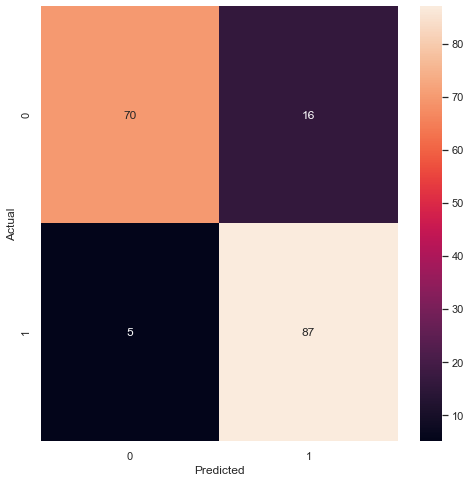

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        86
           1       0.84      0.95      0.89        92

    accuracy                           0.88       178
   macro avg       0.89      0.88      0.88       178
weighted avg       0.89      0.88      0.88       178



In [77]:
classification(SVC(), x_train_std,x_test_std,y_train,y_test)
#This moregeneralize model

In [81]:
params = {'gamma':['scale','auto']}
model = SVC(kernel='rbf', C=1 )
gscv = GridSearchCV(model,params, cv=5, n_jobs=-1)
gscv.fit(x_train_std,y_train)

GridSearchCV(cv=5, estimator=SVC(C=1), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto']})

In [82]:
gscv.best_params_

{'gamma': 'scale'}

=======Accuracy of Training Data========
0.9115168539325843
========Accuracy of Testing Data========
0.8820224719101124
============Confusion Matrix============


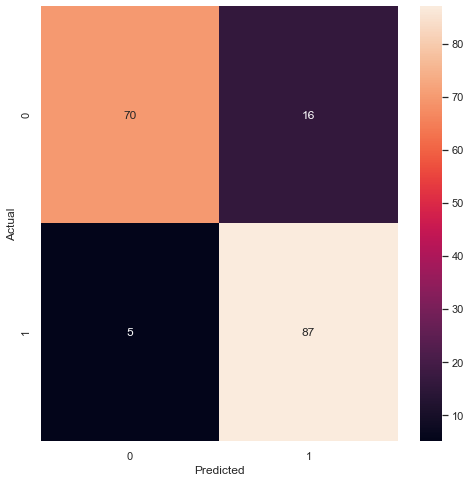

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        86
           1       0.84      0.95      0.89        92

    accuracy                           0.88       178
   macro avg       0.89      0.88      0.88       178
weighted avg       0.89      0.88      0.88       178



In [83]:
classification(SVC(kernel='rbf', C=1,gamma='scale' ),x_train_std,x_test_std,y_train,y_test)#This is overfitted

#### Decision Tree Classifier

=======Accuracy of Training Data========
1.0
========Accuracy of Testing Data========
0.7584269662921348
============Confusion Matrix============


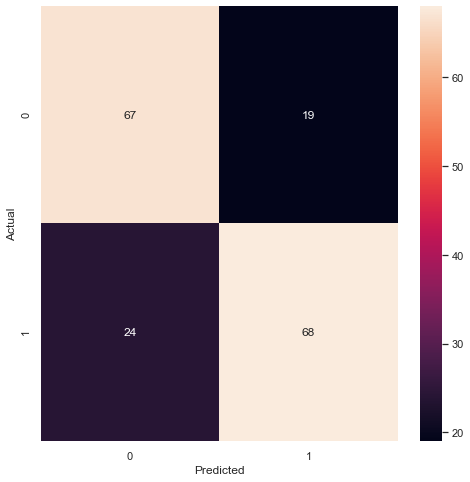

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.78      0.74      0.76        92

    accuracy                           0.76       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.76      0.76      0.76       178



In [84]:
classification(DecisionTreeClassifier(),x_train_std,x_test_std,y_train,y_test)
#Model is highly overfitted
#Tunning needed

In [100]:
params = {'min_samples_leaf':range(1,100)}
model = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=6, min_samples_split=34, min_samples_leaf=14)
gscv1 = GridSearchCV(model,params,cv=5, n_jobs=-1)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                              min_samples_split=34,
                                              splitter='random'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [101]:
gscv1.best_params_

{'min_samples_leaf': 14}

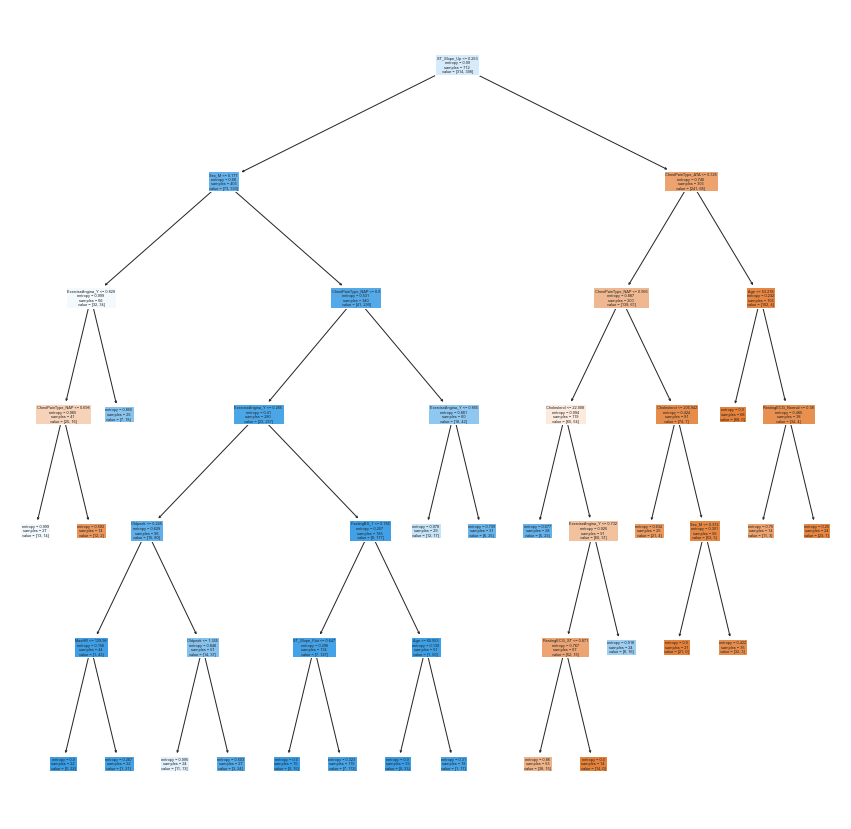

In [102]:
plt.figure(figsize=(15,15))
plot_tree(gscv1.best_estimator_, feature_names=x_train.columns, filled=True)
plt.show()
#Reducing the overfitting

=======Accuracy of Training Data========
0.8539325842696629
========Accuracy of Testing Data========
0.8539325842696629
============Confusion Matrix============


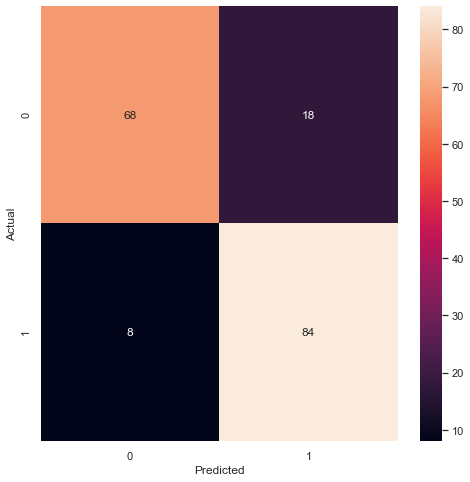

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        86
           1       0.82      0.91      0.87        92

    accuracy                           0.85       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.86      0.85      0.85       178



In [105]:
classification(DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=6, min_samples_split=34, min_samples_leaf=14),x_train,x_test,y_train,y_test)


=======Accuracy of Training Data========
0.8665730337078652
========Accuracy of Testing Data========
0.8595505617977528
============Confusion Matrix============


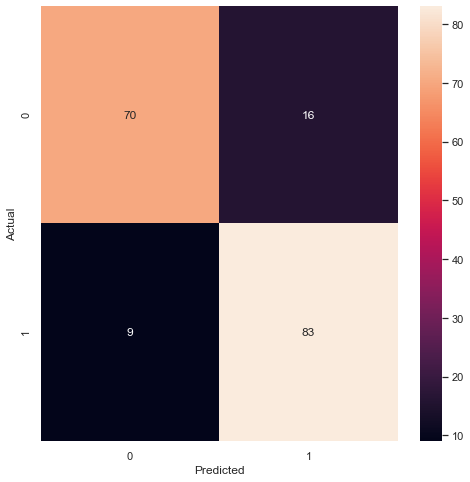

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        86
           1       0.84      0.90      0.87        92

    accuracy                           0.86       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.86      0.86      0.86       178



In [106]:
classification(DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=6, min_samples_split=34, min_samples_leaf=14),x_train_std,x_test_std,y_train,y_test)
#Model is more generalized now

#### Bagging Classifier

=======Accuracy of Training Data========
0.9915730337078652
========Accuracy of Testing Data========
0.8651685393258427
============Confusion Matrix============


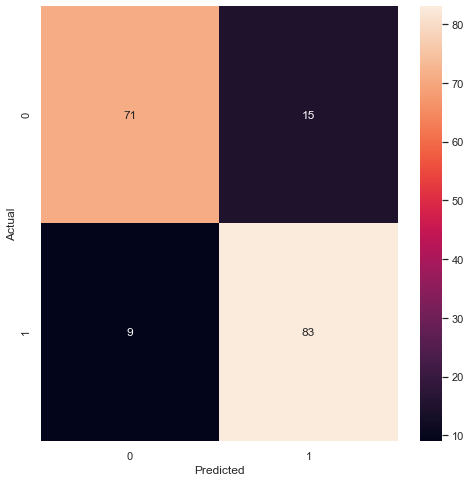

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        86
           1       0.85      0.90      0.87        92

    accuracy                           0.87       178
   macro avg       0.87      0.86      0.86       178
weighted avg       0.87      0.87      0.86       178



In [107]:
classification(BaggingClassifier(),x_train,x_test,y_train,y_test)
#Overfitted
#Bagging classifier trees are highly correlated
#Better to check Random Forrrest or try pruning trees

#### Random Forrest Classifier

=======Accuracy of Training Data========
1.0
========Accuracy of Testing Data========
0.8820224719101124
============Confusion Matrix============


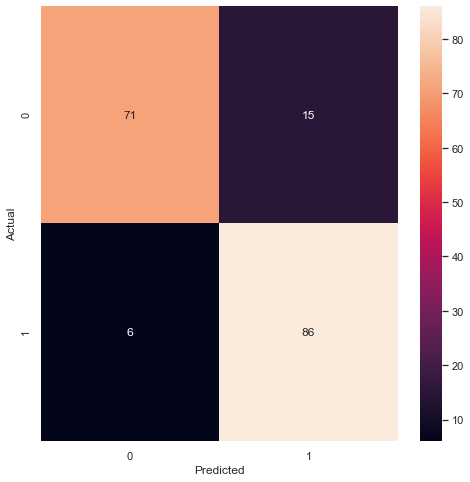

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        86
           1       0.85      0.93      0.89        92

    accuracy                           0.88       178
   macro avg       0.89      0.88      0.88       178
weighted avg       0.89      0.88      0.88       178



In [108]:
classification(RandomForestClassifier(), x_train,x_test,y_train,y_test)
#Pruning needed

In [125]:
params = {'min_samples_leaf':range(1,100)}
model = RandomForestClassifier(n_estimators=34, criterion='gini', max_depth=30,min_samples_split=5, min_samples_leaf=5)
gscv2 = GridSearchCV(model, params,cv=5, n_jobs=-1)
gscv2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, min_samples_split=5,
                                              n_estimators=34),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [126]:
gscv2.best_params_

{'min_samples_leaf': 3}

=======Accuracy of Training Data========
0.9030898876404494
========Accuracy of Testing Data========
0.8820224719101124
============Confusion Matrix============


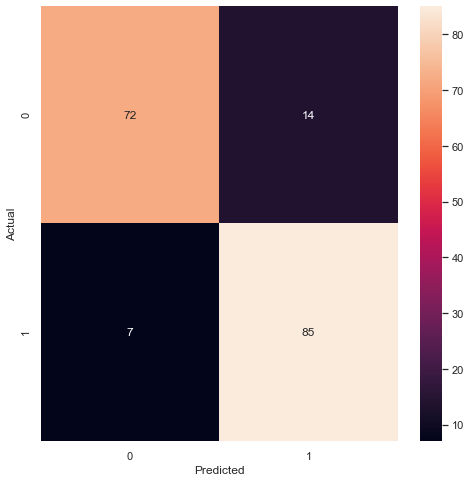

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        86
           1       0.86      0.92      0.89        92

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



In [127]:
classification(RandomForestClassifier(n_estimators=34, criterion='gini', max_depth=30,min_samples_split=5, min_samples_leaf=5), x_train,x_test,y_train,y_test)
#Now the model is more generalised

#### Extra Tree Classifier

=======Accuracy of Training Data========
1.0
========Accuracy of Testing Data========
0.8707865168539326
============Confusion Matrix============


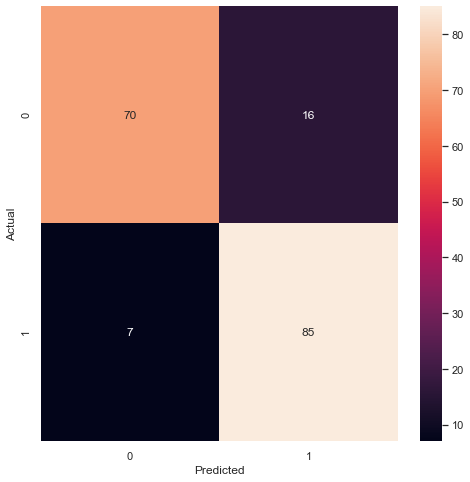

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        86
           1       0.84      0.92      0.88        92

    accuracy                           0.87       178
   macro avg       0.88      0.87      0.87       178
weighted avg       0.87      0.87      0.87       178



In [128]:
classification(ExtraTreesClassifier(),x_train,x_test,y_train,y_test)
#Overfitted
#Tunning essential

In [133]:
params = {'min_samples_split':range(1,100),'min_samples_leaf':range(1,100)}
model = ExtraTreesClassifier(n_estimators=39,max_depth=78,min_samples_leaf=2, min_samples_split=9)
gscv3 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv3.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.86097705 0.86519255 ... 0.81601497 0.82159953 0.82163892]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(max_depth=78, n_estimators=39),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 100),
                         'min_samples_split': range(1, 100)})

In [134]:
gscv3.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 9}

=======Accuracy of Training Data========
0.9157303370786517
========Accuracy of Testing Data========
0.898876404494382
============Confusion Matrix============


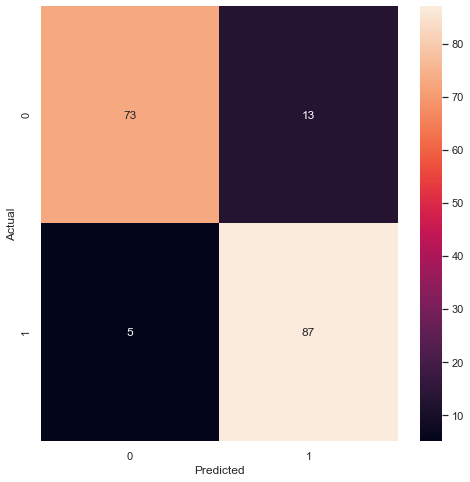

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        86
           1       0.87      0.95      0.91        92

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [135]:
classification(ExtraTreesClassifier(n_estimators=39,max_depth=78,min_samples_leaf=2, min_samples_split=9),x_train,x_test,y_train,y_test)
#Model is more generalized now and accuracy is good

#### AdaBoost classifier

=======Accuracy of Training Data========
0.8848314606741573
========Accuracy of Testing Data========
0.8876404494382022
============Confusion Matrix============


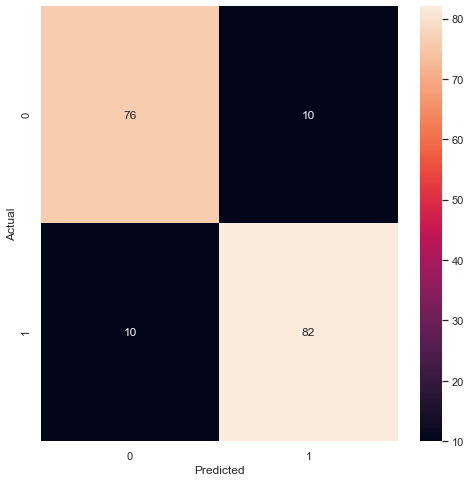

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        86
           1       0.89      0.89      0.89        92

    accuracy                           0.89       178
   macro avg       0.89      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



In [136]:
classification(AdaBoostClassifier(),x_train,x_test,y_train,y_test)
#Model is good, not overfitted
#Tunning can be done

In [142]:
params = {'algorithm':['SAMME','SAMME.R']}
model = AdaBoostClassifier(n_estimators=8,)
gscv4 = GridSearchCV(model,params, cv=5, n_jobs=-1)
gscv4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=8), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R']})

In [143]:
gscv4.best_params_

{'algorithm': 'SAMME.R'}

=======Accuracy of Training Data========
0.875
========Accuracy of Testing Data========
0.8876404494382022
============Confusion Matrix============


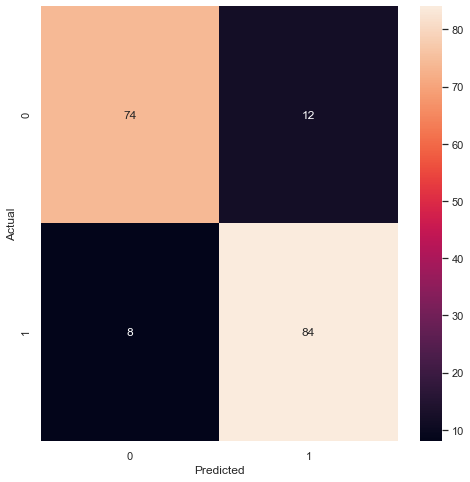

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        86
           1       0.88      0.91      0.89        92

    accuracy                           0.89       178
   macro avg       0.89      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



In [144]:
classification(AdaBoostClassifier(n_estimators=8,),x_train,x_test,y_train,y_test)
#Comparing to the random forrest, random forrest is best

#### Gradient Boost Classifer

=======Accuracy of Training Data========
0.9536516853932584
========Accuracy of Testing Data========
0.9044943820224719
============Confusion Matrix============


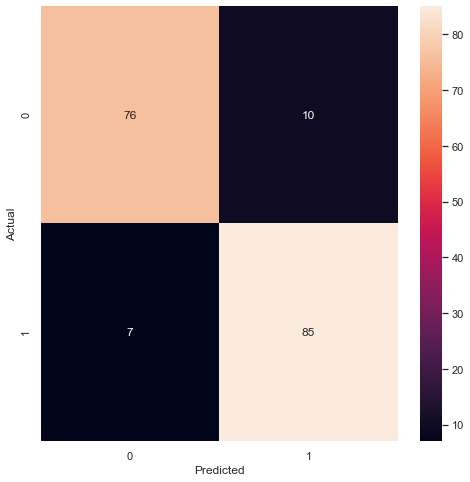

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        86
           1       0.89      0.92      0.91        92

    accuracy                           0.90       178
   macro avg       0.91      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [145]:
classification(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)
#Model is good, tunning can be done

In [150]:
params = {'learning_rate':[i/10 for i in range(1,10)]}
model = AdaBoostClassifier(n_estimators=8, learning_rate=0.7)
gscv5 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv5.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=8), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9]})

In [151]:
gscv5.best_params_

{'learning_rate': 0.7}

=======Accuracy of Training Data========
0.8707865168539326
========Accuracy of Testing Data========
0.8820224719101124
============Confusion Matrix============


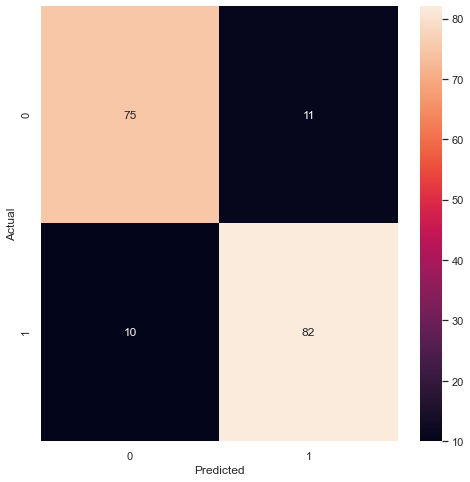

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        86
           1       0.88      0.89      0.89        92

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



In [152]:
classification(AdaBoostClassifier(n_estimators=8, learning_rate=0.7),x_train,x_test,y_train,y_test)

#### XGB Classifier

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
=======Accuracy of Training Data========
1.0
========Accuracy of Testing Data========
0.8764044943820225
============Confusion Matrix============


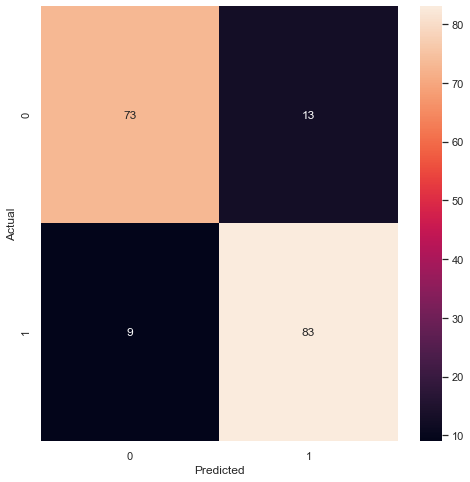

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        86
           1       0.86      0.90      0.88        92

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



In [153]:
classification(XGBClassifier(), x_train,x_test,y_train,y_test)
#Overfitted

In [166]:
params = {'learning_rate':[i/10 for i in range(1,10)]}
model = XGBClassifier(max_depth=3,learning_rate=0.1)
gscv6 = GridSearchCV(model,params, cv=5, n_jobs=-1)
gscv6.fit(x_train,y_train)

[10:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [167]:
gscv6.best_params_

{'learning_rate': 0.1}

<Figure size 1080x1080 with 0 Axes>

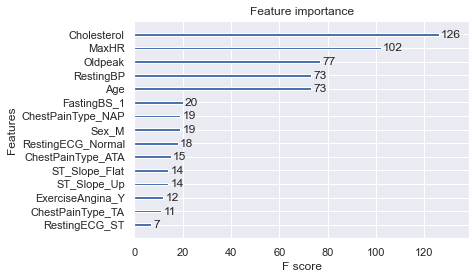

In [165]:
plt.figure(figsize=(15,15))
plot_importance(gscv6.best_estimator_)
plt.savefig('C:\\Lachin\\DataSets\\Heart Failure Prediction\\feature_importance.png')

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
=======Accuracy of Training Data========
0.9339887640449438
========Accuracy of Testing Data========
0.898876404494382
============Confusion Matrix============


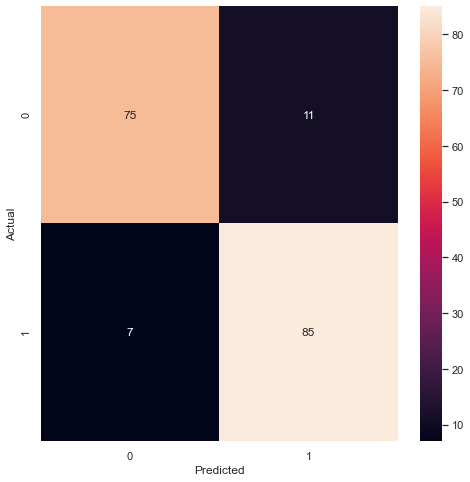

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        86
           1       0.89      0.92      0.90        92

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [168]:
classification(XGBClassifier(max_depth=3,learning_rate=0.1),x_train,x_test,y_train,y_test)
#Model is moregeneralised now

#### Stacking Classifier

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[11:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
=======Accuracy of Training Data========
0.9353932584269663
========Accuracy of Testing Data========
0.9044943820224719
============Confusion Matrix============


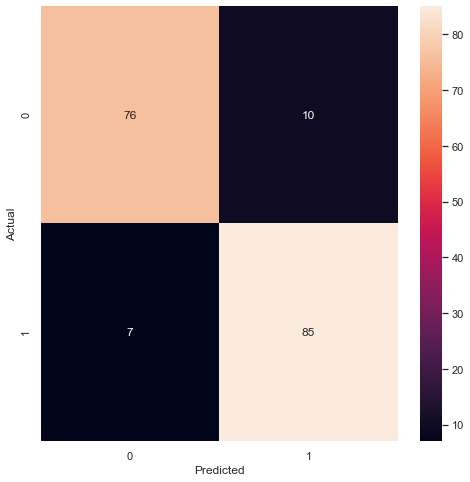

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        86
           1       0.89      0.92      0.91        92

    accuracy                           0.90       178
   macro avg       0.91      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [169]:
T1 = ('xgb', XGBClassifier(max_depth=3,learning_rate=0.1))
T2 = ('gbc',GradientBoostingClassifier())
metamodel = (ExtraTreesClassifier(n_estimators=39,max_depth=78,min_samples_leaf=2, min_samples_split=9))
classification(StackingClassifier(estimators=[T1,T2], final_estimator=metamodel),x_train,x_test,y_train,y_test )
#Model is more generalised here with good testing accuracies

#### Voting Classifier - Hard

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[11:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

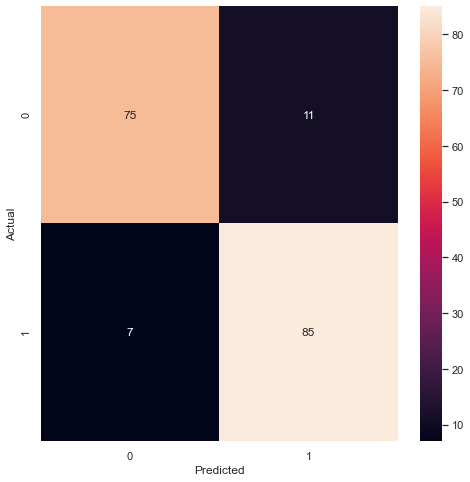

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        86
           1       0.89      0.92      0.90        92

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [170]:
T11 = ('xgb', XGBClassifier(max_depth=3,learning_rate=0.1))
T22 = ('gbc',GradientBoostingClassifier())
T33 = ('stc',StackingClassifier(estimators=[T1,T2], final_estimator=metamodel))
classification(VotingClassifier(estimators=[T11,T22,T33], voting='hard'),x_train,x_test,y_train,y_test)

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[11:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

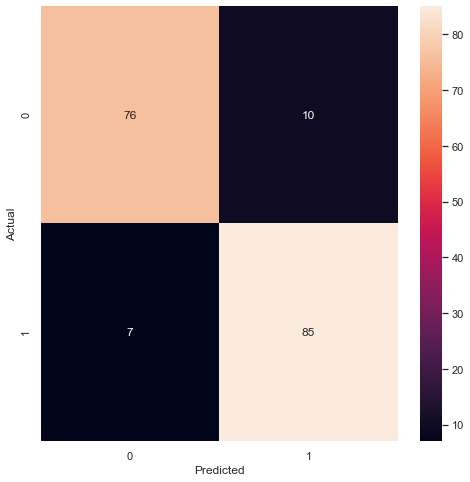

=========Classification Report==========
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        86
           1       0.89      0.92      0.91        92

    accuracy                           0.90       178
   macro avg       0.91      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [171]:
classification(VotingClassifier(estimators=[T11,T22,T33], voting='soft'),x_train,x_test,y_train,y_test)

### Best Model - Stacking Classifier

In [178]:
T1 = ('xgb', XGBClassifier(max_depth=3,learning_rate=0.1))
T2 = ('gbc',GradientBoostingClassifier())
metamodel = (ExtraTreesClassifier(n_estimators=39,max_depth=78,min_samples_leaf=2, min_samples_split=9))
final_model = StackingClassifier(estimators=[T1,T2], final_estimator=metamodel)

In [181]:
final_model.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[11:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.1,
                                              max_delta_step=None, max_depth=3,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                    

In [182]:
accuracy_score(y_test,final_model.predict(x_test))

0.898876404494382

#### Saving model as a pikle file

In [185]:
pickle.dump(final_model,open('Heart_Failure_Predictions.pkl', 'wb'))

In [186]:
file = "C:\Lachin\DataSets\Heart Failure Prediction\Heart_Failure_Predictions.pkl"

In [187]:
pickle.dump(final_model,open(file,'wb'))